In [156]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Chapter 10: Exercises

## Conceptual

**1.** This problem involves the K-means clustering algorithm. 
* (a) Prove (10.12).
* (b) On the basis of this identity, argue that the K-means clustering algorithm (Algorithm 10.1) decreases the objective (10.11) at each iteration.

$$
\frac{1}{|C_k|} \sum\limits_{i,i^{\prime} \in C_k} \sum\limits_{j=1}^p (x_{ij} - x_{i^\prime j})^2 = 
2 \sum\limits_{i \in C_k} \sum\limits_{j=1}^{p} (x_{ij} - \bar{x}_{kj})^2
\\
= \frac{1}{|C_k|} \sum\limits_{i,i^{\prime} \in C_k} \sum\limits_{j=1}^p ((x_{ij} - \bar{x}_{kj}) - (x_{i^\prime j} - \bar{x}_{kj}))^2
\\
= \frac{1}{|C_k|} \sum\limits_{i,i^{\prime} \in C_k} \sum\limits_{j=1}^p ((x_{ij} - \bar{x}_{kj})^2 - 2 (x_{ij} - \bar{x}_{kj})(x_{i^\prime j} - \bar{x}_{kj}) + (x_{i^\prime j} - \bar{x}_{kj})^2)
\\
= \frac{|C_k|}{|C_k|} \sum\limits_{i \in C_k} \sum\limits_{j=1}^p (x_{ij} - \bar{x}_{kj})^2 +
  \frac{|C_k|}{|C_k|} \sum\limits_{i^{\prime} \in C_k} \sum\limits_{j=1}^p (x_{i^\prime j} - \bar{x}_{kj})^2 -
  \frac{2}{|C_k|} \sum\limits_{i,i^{\prime} \in C_k} \sum\limits_{j=1}^p (x_{ij} - \bar{x}_{kj})(x_{i^\prime j} - \bar{x}_{kj})
\\
= 2 \sum\limits_{i \in C_k} \sum\limits_{j=1}^p (x_{ij} - \bar{x}_{kj})^2 + 0
$$

b. Minimizing the sum of the squared Euclidean
distance for each cluster is the same as minimizing the within-cluster variance for each cluster.

**2 (a)** On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

In [29]:
from scipy.spatial.distance import squareform
t = np.array([0.3, 0.4, 0.7, 0.5, 0.8, 0.45])
tt = squareform(t) # what dissimilarity matrix would look like, but we don't use in our clustering
tt

array([[0.  , 0.3 , 0.4 , 0.7 ],
       [0.3 , 0.  , 0.5 , 0.8 ],
       [0.4 , 0.5 , 0.  , 0.45],
       [0.7 , 0.8 , 0.45, 0.  ]])

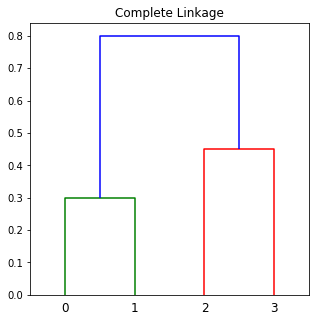

In [31]:
hc_complete = hierarchy.complete(t)
fig = plt.figure(figsize=(5,5))
dn_complete = hierarchy.dendrogram(hc_complete)
plt.title('Complete Linkage')
plt.show();

**(b)** Repeat (a), this time using single linkage clustering.

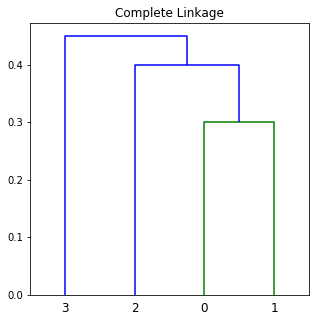

In [32]:
hc_complete = hierarchy.single(t)
fig = plt.figure(figsize=(5,5))
dn_complete = hierarchy.dendrogram(hc_complete)
plt.title('Complete Linkage')
plt.show();

**(c)** Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

>obs 1 and 2 are in a cluster and obs 3 and 4 are in a cluster.

**(d)** Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

>obs 4 is in a cluster and obs 1,2,3 are in a cluster.

**3.** In this problem, you will perform $K$-means clustering manually, with $K$ = 2, on a small example with $n$ = 6 observations and $p$ = 2 features.

**(a)** Plot the observations.

In [3]:
d = {'x1': [1,1,0,5,6,4], 'x2': [4,3,4,1,2,0]}
df = pd.DataFrame(d)
df

,x1,x2
0,1,4
1,1,3
2,0,4
3,5,1
4,6,2
5,4,0


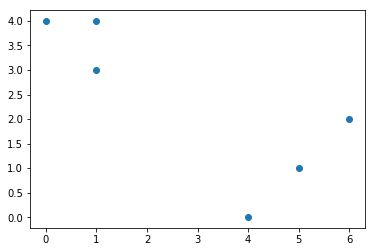

In [4]:
plt.scatter(df.x1,df.x2);

**(b)** Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation.

In [6]:
cluster1 = df.sample(frac=0.5, random_state=17)
cluster1

,x1,x2
2,0,4
3,5,1
4,6,2


In [20]:
cluster2 = df.loc[df.index.difference(cluster1.index)]
cluster2

,x1,x2
0,1,4
1,1,3
5,4,0


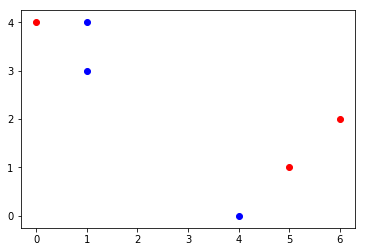

In [29]:
plt.scatter(cluster1.x1, cluster1.x2, c='r')
plt.scatter(cluster2.x1, cluster2.x2, c='b');

**(c)** Compute the centroid for each cluster.

In [36]:
# cluster1 centroid coordinates
c1_cent = np.mean(cluster1.x1), np.mean(cluster1.x2)
c1_cent

(3.6666666666666665, 2.3333333333333335)

In [37]:
# cluster2 centroid coordinates
c2_cent = np.mean(cluster2.x1), np.mean(cluster2.x2)
c2_cent

(2.0, 2.3333333333333335)

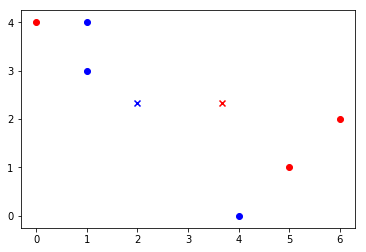

In [39]:
plt.scatter(cluster1.x1, cluster1.x2, c='r')
plt.scatter(cluster2.x1, cluster2.x2, c='b')
plt.scatter(np.mean(cluster1.x1), np.mean(cluster1.x2), color='r', marker='x')
plt.scatter(np.mean(cluster2.x1), np.mean(cluster2.x2), color='b', marker='x');

**(d)** Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [41]:
from scipy.spatial import distance

In [86]:
c1_dist = []
c2_dist = []

for i in range(len(df)):
        c1_dist.append(distance.euclidean(c1_cent, (df.x1.iloc[i], df.x2.iloc[i])))
        c2_dist.append(distance.euclidean(c2_cent, (df.x1.iloc[i], df.x2.iloc[i])))

df['c1_dist'] = c1_dist
df['c2_dist'] = c2_dist       
df['closest'] = np.where(df['c1_dist']<df['c2_dist'], 'c1','c2')
df

,x1,x2,c1_dist,c2_dist,closest
0,1,4,3.144660,1.943651,c2
1,1,3,2.748737,1.201850,c2
2,0,4,4.027682,2.603417,c2
3,5,1,1.885618,3.282953,c1
4,6,2,2.357023,4.013865,c1
5,4,0,2.357023,3.073181,c1


**(e)** Repeat (c) and (d) until the answers obtained stop changing.

In [119]:
# compute new centroid for cluster1
c1_cent = np.mean(df.loc[df['closest']=='c1'].x1), np.mean(df.loc[df['closest']=='c1'].x2)
c1_cent

(5.0, 1.0)

In [118]:
# compute new centroid for cluster2
c2_cent = np.mean(df.loc[df['closest']=='c2'].x1), np.mean(df.loc[df['closest']=='c2'].x2)
c2_cent

(0.6666666666666666, 3.6666666666666665)

In [120]:
# check our new distances

c1_dist = []
c2_dist = []

for i in range(len(df)):
        c1_dist.append(distance.euclidean(c1_cent, (df.x1.iloc[i], df.x2.iloc[i])))
        c2_dist.append(distance.euclidean(c2_cent, (df.x1.iloc[i], df.x2.iloc[i])))

df['c1_dist'] = c1_dist
df['c2_dist'] = c2_dist       
df['closest'] = np.where(df['c1_dist']<df['c2_dist'], 'c1','c2')
df

,x1,x2,c1_dist,c2_dist,closest
0,1,4,5.000000,0.471405,c2
1,1,3,4.472136,0.745356,c2
2,0,4,5.830952,0.745356,c2
3,5,1,0.000000,5.088113,c1
4,6,2,1.414214,5.587685,c1
5,4,0,1.414214,4.955356,c1


**(f)** In your plot from (a), color the observations according to the cluster labels obtained.

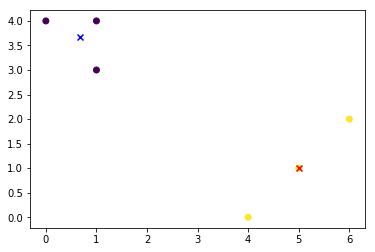

In [154]:
color_idx = pd.factorize(df.closest)[0]
plt.scatter(df.x1, df.x2, c=color_idx)
plt.scatter(c1_cent[0],c1_cent[1], color='r', marker='x')
plt.scatter(c2_cent[0],c2_cent[1], color='b', marker='x');

**4.a** Not enough information to tell.

**4.b** They are leafs (not clusters) so they fuse at the same height.

**5.** In words, describe the results that you would expect if you performed $K$-means clustering of the eight shoppers in Figure 10.14, on the basis of their sock and computer purchases, with $K$ = 2. Give three answers, one for each of the variable scalings displayed. Explain.

>left figure: customers who purchased the fewest socks would be in one cluster and customers who purchased the most socks would be in the other cluster.

>center figure: clusters will be on whether purchases computer or not. Scaling makes the distance of computer yes/no a greater distance.

>right figure: cluster on whether purchased computer or not. large euclidean distance.

## Applied

**7.** In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the $i$th and $j$th observations, then the quantity 1 − $r_{ij}$ is proportional to the squared Euclidean distance between the $i$th and $j$th observations.
On the `USArrests` data, show that this proportionality holds.

PROVE: 1-corr proportianal to sqd. euc. dist

In [155]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [157]:
# scale our df. mean = zero, std.dev. = 1
X = scale(df)

In [166]:
from scipy.spatial.distance import pdist, squareform

In [322]:
# squared euclidian distance
a = squareform(pdist(X))**2
aa = pdist(X)**2
aaa = squareform(pdist(X))
a

array([[ 0.        ,  7.4594756 ,  5.36758447, ...,  9.96075989,
        12.53383017,  3.41389473],
       [ 7.4594756 ,  0.        ,  7.44231842, ..., 20.66745116,
        24.21239223, 12.4953264 ],
       [ 5.36758447,  7.44231842,  0.        , ..., 20.63956869,
        15.86121383,  7.39642265],
       ...,
       [ 9.96075989, 20.66745116, 20.63956869, ...,  0.        ,
         4.20868377,  3.61482254],
       [12.53383017, 24.21239223, 15.86121383, ...,  4.20868377,
         0.        ,  3.10587433],
       [ 3.41389473, 12.4953264 ,  7.39642265, ...,  3.61482254,
         3.10587433,  0.        ]])

In [319]:
# correlation based distance
b = squareform(pdist(1-np.corrcoef(X).T))
bb = pdist(1-np.corrcoef(X).T)
bbb = 1-np.corrcoef(X).T
bbb

array([[0.00000000e+00, 7.13830782e-01, 1.44659478e+00, ...,
        3.84036580e-02, 1.79306752e+00, 3.43285285e-01],
       [7.13830782e-01, 0.00000000e+00, 8.30724590e-01, ...,
        6.15246672e-01, 1.77689190e+00, 1.32770869e+00],
       [1.44659478e+00, 8.30724590e-01, 0.00000000e+00, ...,
        1.60340210e+00, 9.95020053e-01, 1.01671234e+00],
       ...,
       [3.84036580e-02, 6.15246672e-01, 1.60340210e+00, ...,
        2.22044605e-16, 1.77733457e+00, 5.61867606e-01],
       [1.79306752e+00, 1.77689190e+00, 9.95020053e-01, ...,
        1.77733457e+00, 0.00000000e+00, 1.31975380e+00],
       [3.43285285e-01, 1.32770869e+00, 1.01671234e+00, ...,
        5.61867606e-01, 1.31975380e+00, 1.11022302e-16]])

In [324]:
a/bbb

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[         nan,  10.44992145,   3.71049621, ..., 259.37008137,
          6.99016074,   9.94477444],
       [ 10.44992145,          nan,   8.95882765, ...,  33.5921381 ,
         13.62626065,   9.41119575],
       [  3.71049621,   8.95882765,          nan, ...,  12.87235974,
         15.94059717,   7.27484302],
       ...,
       [259.37008137,  33.5921381 ,  12.87235974, ...,   0.        ,
          2.36797496,   6.43358417],
       [  6.99016074,  13.62626065,  15.94059717, ...,   2.36797496,
                 nan,   2.35337403],
       [  9.94477444,   9.41119575,   7.27484302, ...,   6.43358417,
          2.35337403,   0.        ]])

In [283]:
# matches b, but need in 1d array
1-np.corrcoef(X).T

array([[0.00000000e+00, 7.13830782e-01, 1.44659478e+00, ...,
        3.84036580e-02, 1.79306752e+00, 3.43285285e-01],
       [7.13830782e-01, 0.00000000e+00, 8.30724590e-01, ...,
        6.15246672e-01, 1.77689190e+00, 1.32770869e+00],
       [1.44659478e+00, 8.30724590e-01, 0.00000000e+00, ...,
        1.60340210e+00, 9.95020053e-01, 1.01671234e+00],
       ...,
       [3.84036580e-02, 6.15246672e-01, 1.60340210e+00, ...,
        2.22044605e-16, 1.77733457e+00, 5.61867606e-01],
       [1.79306752e+00, 1.77689190e+00, 9.95020053e-01, ...,
        1.77733457e+00, 0.00000000e+00, 1.31975380e+00],
       [3.43285285e-01, 1.32770869e+00, 1.01671234e+00, ...,
        5.61867606e-01, 1.31975380e+00, 1.11022302e-16]])

In [246]:
from scipy.spatial.distance import cdist

cdist(a, bbb)

array([[ 46.91349484,  48.19563286,  49.95582476, ...,  46.96413396,
         51.06020416,  47.74271664],
       [ 97.68348896,  97.75881142,  99.44564131, ...,  97.6444378 ,
        101.00669727,  98.66104696],
       [ 67.80854458,  67.83167622,  67.99255594, ...,  67.87564848,
         68.77463072,  67.8305599 ],
       ...,
       [ 86.83142325,  87.46522481,  87.6293382 , ...,  86.82372833,
         87.12669902,  86.78946012],
       [ 78.80442535,  78.89268186,  77.55356975, ...,  78.8014271 ,
         75.96352079,  77.91792196],
       [ 36.59248162,  37.28723379,  36.74245129, ...,  36.61408612,
         35.67588727,  36.02473577]])

In [193]:
from scipy import stats

In [236]:
squareform(aa)

array([[ 0.        ,  7.4594756 ,  5.36758447, ...,  9.96075989,
        12.53383017,  3.41389473],
       [ 7.4594756 ,  0.        ,  7.44231842, ..., 20.66745116,
        24.21239223, 12.4953264 ],
       [ 5.36758447,  7.44231842,  0.        , ..., 20.63956869,
        15.86121383,  7.39642265],
       ...,
       [ 9.96075989, 20.66745116, 20.63956869, ...,  0.        ,
         4.20868377,  3.61482254],
       [12.53383017, 24.21239223, 15.86121383, ...,  4.20868377,
         0.        ,  3.10587433],
       [ 3.41389473, 12.4953264 ,  7.39642265, ...,  3.61482254,
         3.10587433,  0.        ]])

In [269]:
stats.describe(squareform(aa/bbb2))

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:943: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


DescribeResult(nobs=50, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([           inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
       3.65647571e+03,            inf, 1.69736294e+17,            inf,
       6.38854560e+15,            inf, 2.97354876e+02,            inf,
                  inf, 1.16536360e+03, 1.84731677e+16, 1.96090886e+02,
                  inf,            inf,            inf, 2.64648757e+02,
       1.44787765e+03,            inf, 1.16010095e+03,            inf,
       1.69736294e+17, 2.30787485e+02,            inf,            inf,
       5.96329043e+02, 4.28576995e+04,            inf,            inf,
       4.06020844e+02, 4.28576995e+

In [218]:
tt = pd.DataFrame(squareform(aa/bb))
tt.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,1.751157,0.703271,1.208771,1.172264,0.864327,1.057776,0.575814,3.576288,0.843715,...,3.671138,0.340656,0.423243,0.934121,5.208806,0.774468,0.728361,11.145645,1.235962,0.963696
1,1.751157,0.000000,1.284213,2.462424,1.356094,1.023244,2.490174,1.901040,2.099100,1.990969,...,8.649212,1.707334,1.454587,1.822992,14.860737,2.339219,1.439050,5.249337,2.649621,2.206251
2,0.703271,1.284213,0.000000,1.010268,0.618412,0.539709,2.300078,1.322246,0.463411,1.027583,...,2.355176,0.702154,0.468514,1.480353,3.788359,0.747556,1.299786,2.636429,3.088935,1.312090
3,1.208771,2.462424,1.010268,0.000000,1.585697,1.020345,0.668777,0.438555,5.922070,2.204965,...,2.175072,0.998161,0.774532,0.654754,3.616335,0.294779,0.474088,2.776660,0.661140,0.232105
4,1.172264,1.356094,0.618412,1.585697,0.000000,0.875405,4.149989,2.027342,0.479338,1.308347,...,3.057265,1.059232,0.808245,3.927232,4.566050,1.311916,7.841724,3.330279,5.936911,1.847526


In [217]:
tt.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
0,50.0,1.865913,4.135274,0.0,0.676806,0.914858,1.266411,28.056805
1,50.0,2.604112,2.297045,0.0,1.582826,1.972396,2.593769,14.860737
2,50.0,2.622909,7.186290,0.0,0.702433,1.305938,2.116724,51.032461
3,50.0,1.238957,1.207140,0.0,0.434646,0.719722,1.814843,5.922070
4,50.0,3.490958,5.578384,0.0,1.087490,2.161242,3.923890,39.206862
5,50.0,1.717295,1.472233,0.0,0.877653,1.291568,2.179940,8.796356
6,50.0,1.488218,1.203419,0.0,0.721947,1.064807,1.800774,6.136992
7,50.0,1.055155,0.809885,0.0,0.575317,0.880588,1.299935,5.230714
8,50.0,3.026868,3.726424,0.0,1.176463,1.767787,3.503835,22.181856
9,50.0,2.103028,2.666196,0.0,0.981087,1.347330,1.937467,16.809328
